In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# Business Understanding

Stack Overflow is a Q&A website for programmers, and the annual developer survey examines aspects related to the developers experience, such as job search, job satisfaction, education, career, etc. These datasets could give us some insights about working in large companies, or even how could we start our own coding business based on what developers answered.

# Data Understanding

For this project, we will be using four datasets from Stackoverflow, with results of annual developer survey from 2019 to 2020

In [2]:
df_2019 = pd.read_csv('survey_results_public_2019.csv',low_memory=False)
df_2020 = pd.read_csv('survey_results_public_2020.csv',low_memory=False)

In [3]:
# Number of rows and columns in df_2019
df_2019.shape

(88883, 85)

In [4]:
# Number of rows and columns in df_2020
df_2020.shape

(64461, 61)

As we could see, 2019 had more respondants and more questions. Let's check which questions were used on both years, so we can use them to compare the differeces between 2019 and 2020:

In [5]:
schema_2019 = pd.read_csv('survey_results_schema_2019.csv',low_memory=False)
schema_2020 = pd.read_csv('survey_results_schema_2020.csv',low_memory=False)

In [6]:
schema = (schema_2019.rename(columns={'QuestionText':'Question_2019'})
          .merge(schema_2020.rename(columns={'QuestionText':'Question_2020'}), on='Column', how='inner'))
schema

,Column,Question_2019,Question_2020
0,Respondent,Randomized respondent ID number (not in order ...,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?,Do you code as a hobby?
3,Employment,Which of the following best describes your cur...,Which of the following best describes your cur...
4,Country,In which country do you currently reside?,Where do you live?
5,EdLevel,Which of the following best describes the high...,Which of the following best describes the high...
6,UndergradMajor,What was your main or most important field of ...,What was your primary field of study?
7,OrgSize,Approximately how many people are employed by ...,Approximately how many people are employed by ...
8,DevType,Which of the following describe you? Please se...,Which of the following describe you? Please se...
9,YearsCode,"Including any education, how many years have y...","Including any education, how many years have y..."


From the table above, 43 questions were made on both years, so we can use them to our analysis, but we need to keep in mind that some respondents should have same ID, as a result of concatenating two surveys. Let's now select these columns on both dataframes, and merge them, including a "Year" column, which describes the year of the survey

In [7]:
# Creating a list with all the intersection columns
column_list = schema.Column.to_list()

In [8]:
df_2019 = df_2019[df_2019.columns.intersection(column_list)]
df_2019['Year'] = 2019  #Year of survey
df_2019.sample()

,Respondent,MainBranch,Hobbyist,Employment,Country,EdLevel,UndergradMajor,OrgSize,DevType,YearsCode,...,SOComm,WelcomeChange,Age,Gender,Trans,Sexuality,Ethnicity,SurveyLength,SurveyEase,Year
77535,78021,"I am not primarily a developer, but I write co...",Yes,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","10,000 or more employees","Developer, front-end;Engineering manager",20,...,Neutral,Just as welcome now as I felt last year,38.0,Man,No,Straight / Heterosexual,White or of European descent,Appropriate in length,Easy,2019


In [9]:
df_2020 = df_2020[df_2020.columns.intersection(column_list)]
df_2020['Year'] = 2020  #Year of survey
df_2020.sample()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,Year
61115,62348,I am a student who is learning to code,Yes,21.0,16,NaN,NaN,NaN,Germany,NaN,...,A few times per week,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Just as welcome now as I felt last year,NaN,5,NaN,2020


Now, we can append the results, and create one unique dataframe to work with:

In [10]:
df = df_2019.append(df_2020, ignore_index=True)
df.sample()

,Respondent,MainBranch,Hobbyist,Employment,Country,EdLevel,UndergradMajor,OrgSize,DevType,YearsCode,...,SOComm,WelcomeChange,Age,Gender,Trans,Sexuality,Ethnicity,SurveyLength,SurveyEase,Year
89578,697,I am a developer by profession,No,Employed full-time,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,"Developer, back-end;Developer, front-end;Devel...",12,...,"Yes, definitely",Just as welcome now as I felt last year,28.0,Man,No,Straight / Heterosexual,White or of European descent,Appropriate in length,Easy,2020


In [11]:
df.shape

(153344, 44)

In [12]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,Age,Year
count,153344.000000,9.077100e+04,9.057900e+04,105654.000000,124656.000000,153344.000000
mean,39444.691804,1.224082e+242,1.181493e+05,41.603326,30.518041,2019.420369
std,23817.410483,inf,2.638965e+05,31.191194,9.331862,0.493620
min,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,2019.000000
25%,19168.750000,2.000000e+04,2.525400e+04,40.000000,24.000000,2019.000000
50%,38458.500000,6.200000e+04,5.522400e+04,40.000000,29.000000,2019.000000
75%,57942.000000,1.200000e+05,9.900000e+04,44.000000,35.000000,2020.000000
max,88883.000000,1.111111e+247,2.000000e+06,4850.000000,279.000000,2020.000000


In [13]:
# Counting the percentage of missing values of each column
missing_values = df.isnull().sum()/len(df)*100
missing_values_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': missing_values}).sort_values(by='percent_missing',ascending=False).reset_index(drop=True)
missing_values_df.head()

,column_name,percent_missing
0,ConvertedComp,40.930848
1,CompTotal,40.805640
2,MiscTechWorkedWith,34.852358
3,PurchaseWhat,33.878730
4,CompFreq,32.610992


array([[<AxesSubplot:title={'center':'percent_missing'}>]], dtype=object)

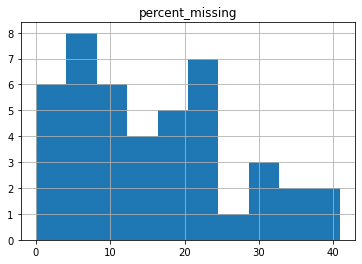

In [14]:
missing_values_df.hist()

In [15]:
missing_values_df.describe()

,percent_missing
count,44.000000
mean,15.640192
std,11.446709
min,0.000000
25%,5.693408
50%,14.249335
75%,23.789649
max,40.930848


About 75% of the columns have up to 24% of missing values, and the variable with more missing data is ConvertedComp, so we need to keep this in mind for future analysis

Now, let's check if there're evidences of changes of the responses over the two years:

<AxesSubplot:xlabel='Employment'>

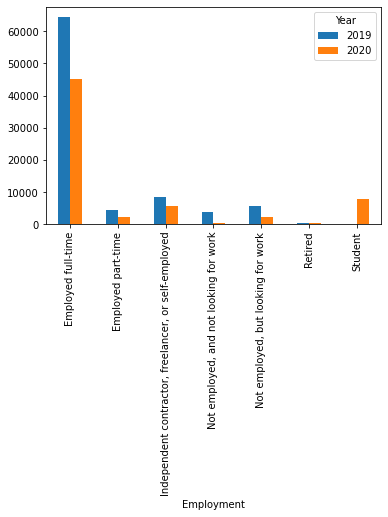

In [16]:
df.pivot_table(index='Employment', columns='Year', values='Respondent', aggfunc='count').plot(kind='bar')

<AxesSubplot:xlabel='OrgSize'>

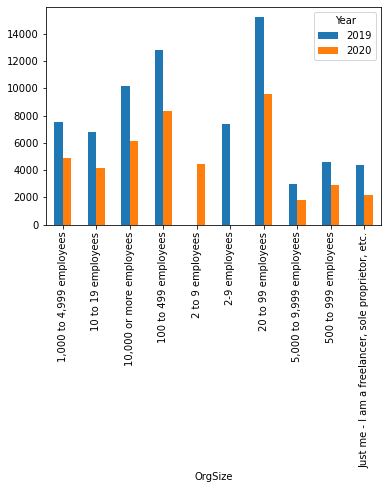

In [17]:
df.pivot_table(index='OrgSize', columns='Year', values='Respondent', aggfunc='count').plot(kind='bar')

# Data Preparation

As we saw before, we have different answers for "2 to 9 employees", so we'll clean it, keeping only one:

In [18]:
# Converting company size name for 2-9 company size:
df['OrgSize'] = np.where(df.OrgSize == '2-9 employees', '2 to 9 employees', df.OrgSize)

In addition, we'll simplify 'Just me - I am a freelancer, sole proprietor, etc.' to 'Just me', for better data visualizations:

In [19]:
# Converting value name for those who work solo
df['OrgSize'] = np.where(df.OrgSize == 'Just me - I am a freelancer, sole proprietor, etc.', 'Just me', df.OrgSize)

We also saw that YearsCode is an object column. It would be nice to have this column as a integer:

In [20]:
df.YearsCode.dtypes

dtype('O')

In [21]:
df.YearsCode.unique()

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', 'Less than 1 year', '30', '9', '26', '40', '19',
       '15', '20', '28', '25', '1', '22', '11', '33', '50', '41', '18',
       '34', '24', '23', '42', '27', '21', '36', '32', '39', '38', '31',
       '37', 'More than 50 years', '29', '44', '45', '48', '46', '43',
       '47', '49'], dtype=object)

We can see that YearsCode is an object type, se we can't perform numerical operations across them. To solve this, let's consider that 'Lass than 1 year' is 0 and 'More tha 50 years' is 50:

In [22]:
# Converting strings to number for further usage:
df['YearsCode'] = np.where(df.YearsCode == 'Less than 1 year', '0', df.YearsCode)
df['YearsCode'] = np.where(df.YearsCode == 'More than 50 years', '50', df.YearsCode)

Here I'll create some definitions of company size, to help us in further analysis:

In [23]:
# Defining company size lists based on the number of employees
large_comp_list = ['10,000 or more employees', '5,000 to 9,999 employees', '1,000 to 4,999 employees']
mid_comp_list = ['100 to 499 employees', '500 to 999 employees']
small_comp_list = ['2 to 9 employees', '10 to 19 employees', '20 to 99 employees']
solo_list = 'Just me'

# Questions

Now, let's try to answer some questions regarding the data we explored above

## How is the income for those who work sole compared to those who are employed?

For those who are employed, what's the percentage of company size within each employment status? Let's first take a look at how is the distribution over these variables:

In [24]:
employee_df = df.groupby(['Employment', 'OrgSize']).Respondent.count().reset_index()

In [25]:
employee_df.sample()

,Employment,OrgSize,Respondent
15,Employed part-time,"5,000 to 9,999 employees",137


<AxesSubplot:xlabel='Employment'>

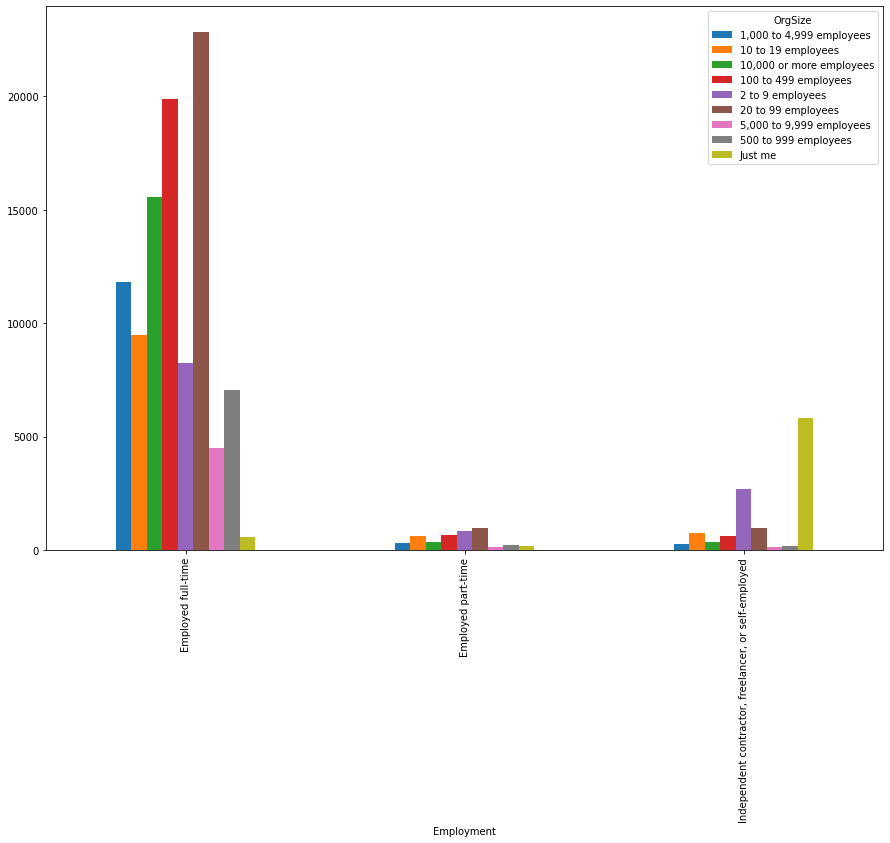

In [26]:
employee_pivot = employee_df.pivot_table(index='Employment', columns='OrgSize', values='Respondent', aggfunc='sum')
employee_pivot.plot(kind='bar', figsize=(15,10))

In [27]:
employee_df.sort_values(['Employment', 'Respondent'], ascending=False)

,Employment,OrgSize,Respondent
26,"Independent contractor, freelancer, or self-em...",Just me,5814
22,"Independent contractor, freelancer, or self-em...",2 to 9 employees,2674
23,"Independent contractor, freelancer, or self-em...",20 to 99 employees,993
19,"Independent contractor, freelancer, or self-em...",10 to 19 employees,765
21,"Independent contractor, freelancer, or self-em...",100 to 499 employees,611
20,"Independent contractor, freelancer, or self-em...","10,000 or more employees",367
18,"Independent contractor, freelancer, or self-em...","1,000 to 4,999 employees",276
25,"Independent contractor, freelancer, or self-em...",500 to 999 employees,194
24,"Independent contractor, freelancer, or self-em...","5,000 to 9,999 employees",132
14,Employed part-time,20 to 99 employees,960


We're interested in respondents which had aswered the Employment and OrgSize question, so let's clean the data and keep only the rows without these variables null:

In [28]:
employment_df = df[(df['Employment'].notnull()) & (df['OrgSize'].notnull()) & (df['ConvertedComp'].notnull())]
employment_df.shape

(89006, 44)

<AxesSubplot:xlabel='OrgSize'>

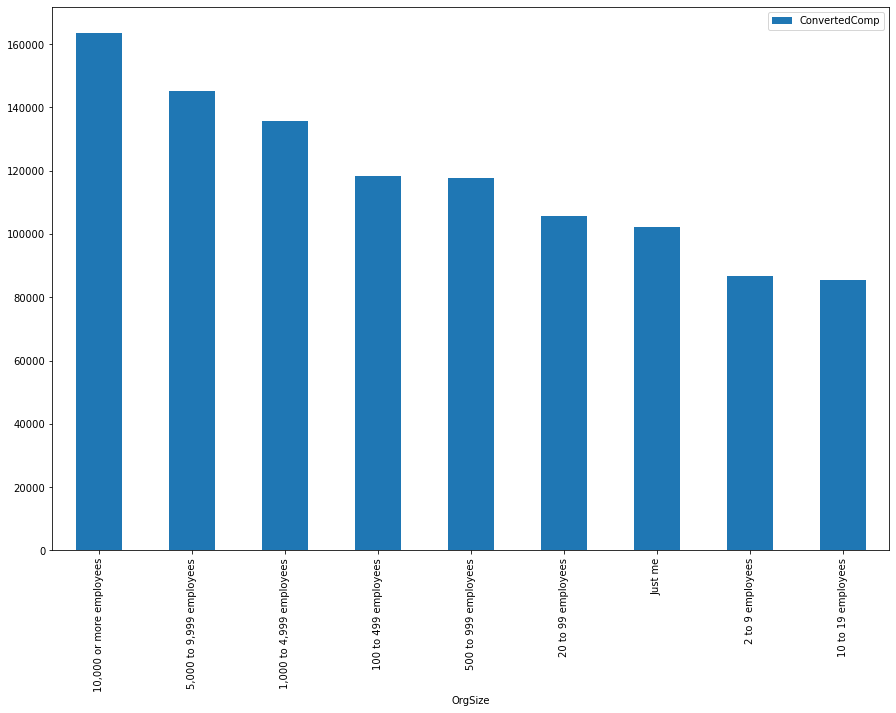

In [29]:
employment_gb = employment_df.groupby('OrgSize').agg({'ConvertedComp':'mean'}).reset_index() # grouping by organization size
employment_gb = employment_gb.sort_values(by='ConvertedComp', ascending=False).set_index('OrgSize') #sorting by larger income
employment_gb.plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='OrgSize'>

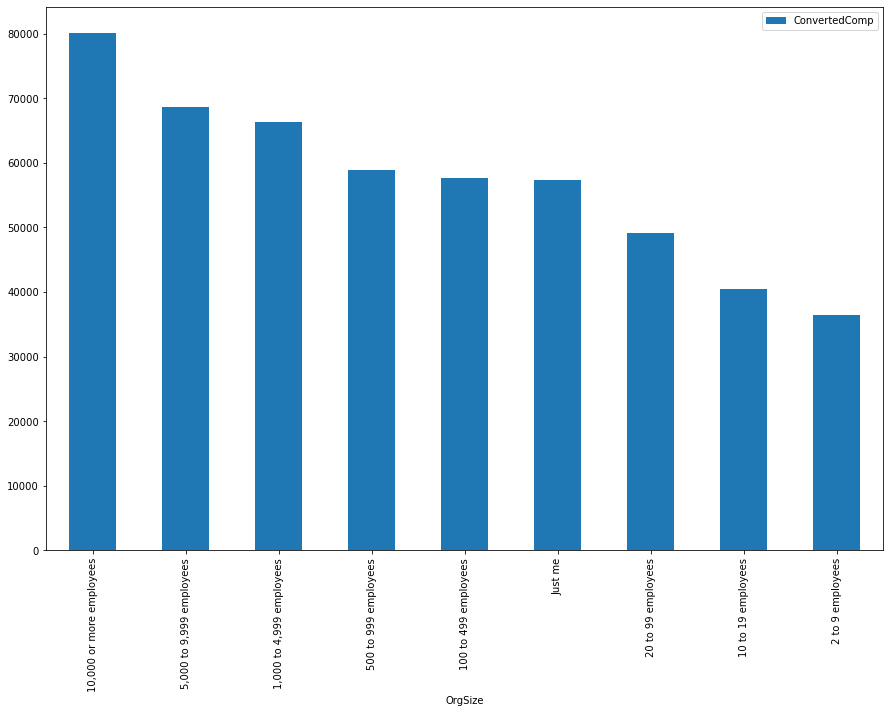

In [30]:
employment_gb = employment_df.groupby('OrgSize').agg({'ConvertedComp':'median'}).reset_index() # grouping by organization size
employment_gb = employment_gb.sort_values(by='ConvertedComp', ascending=False).set_index('OrgSize') #sorting by larger income
employment_gb.plot.bar(figsize=(15,10))

In general, we can see that people who worked in larger companies had higher incomes. Now, let's break it into the years and see if had any difference through the years

Text(0, 0.5, 'Average salary converted to annual USD salaries')

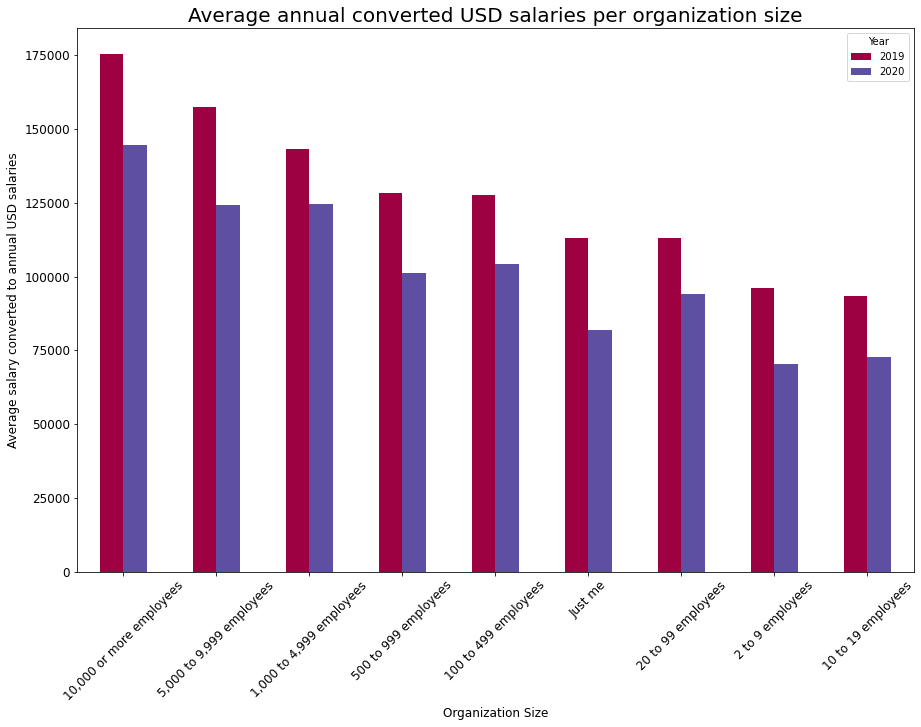

In [31]:
employment_pivot = employment_df.pivot_table(index='OrgSize', columns='Year', values='ConvertedComp', aggfunc='mean')
employment_pivot = employment_pivot.sort_values(by=2019, ascending=False)
ax = employment_pivot.plot.bar(figsize=(15,10),
                               fontsize = 12,
                               colormap="Spectral",
                               rot=45)
ax.set_title("Average annual converted USD salaries per organization size", fontsize = 20)
ax.set_xlabel("Organization Size", fontsize = 12)
ax.set_ylabel("Average salary converted to annual USD salaries", fontsize = 12)

Text(0, 0.5, 'Median of salary converted to annual USD salaries')

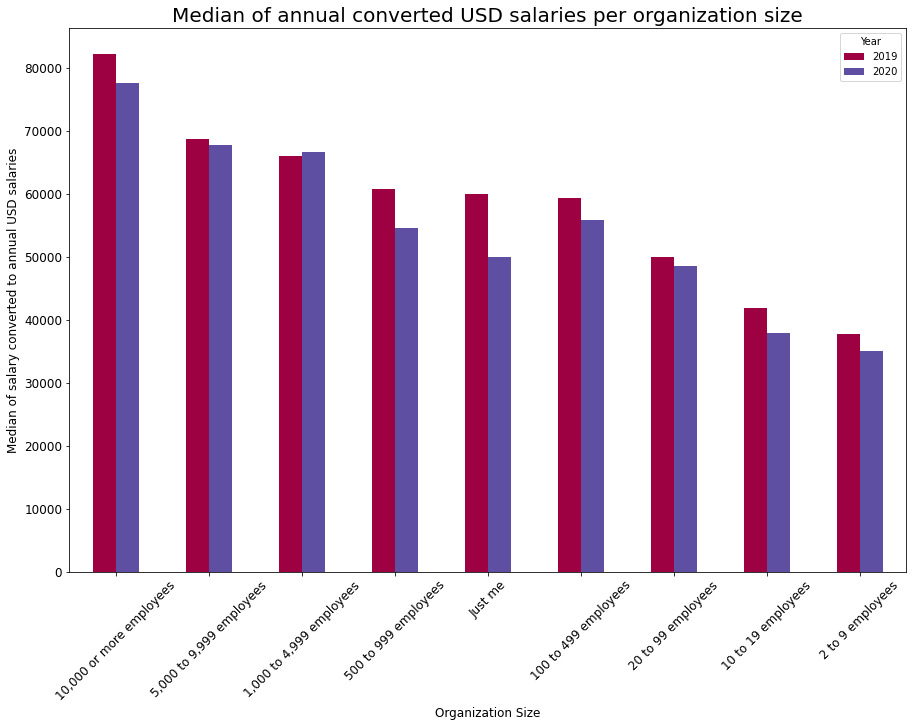

In [32]:
employment_pivot_m = employment_df.pivot_table(index='OrgSize', columns='Year', values='ConvertedComp', aggfunc='median')
employment_pivot_m = employment_pivot_m.sort_values(by=2019, ascending=False)
ax = employment_pivot_m.plot.bar(figsize=(15,10),
                               fontsize = 12,
                               colormap="Spectral",
                               rot=45)
ax.set_title("Median of annual converted USD salaries per organization size", fontsize = 20)
ax.set_xlabel("Organization Size", fontsize = 12)
ax.set_ylabel("Median of salary converted to annual USD salaries", fontsize = 12)

What can we conclude from the graph above:
- In general, large companies (10k + employees) usually pay more, followed by medium companies with more than 1k and less than 10k employees
- Despite the decrease of freelancers/sole proprietor average income in 2020, they seem to be better than companies with less than 20 employees in terms of compensation

## How many programming languages should I know to run my own business?

First, let's try find out which of the programming languages were most used by the respondents:

In [33]:
# As LanguageWorkedWith have multiple choices, we need to dummy this column, following this process: 
lang_df = df.LanguageWorkedWith.str.get_dummies(sep=';') # getting all responses from each respondent
lang_df = lang_df.melt() # here we transform all the columns into one
lang_df = lang_df.groupby('variable').value.sum().reset_index() # now we can count the number of occurences for each language
lang_df = lang_df.sort_values(by='value', ascending=False)

In [34]:
lang_df.head()

,variable,value
14,JavaScript,98041
11,HTML/CSS,91647
25,SQL,78957
21,Python,61730
13,Java,58991


<AxesSubplot:xlabel='variable'>

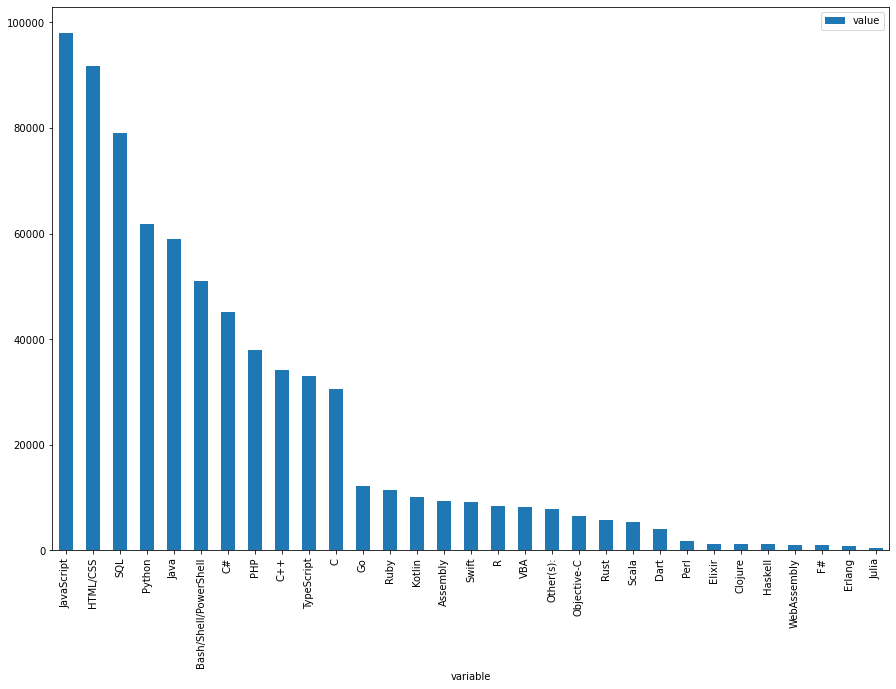

In [35]:
lang_df.set_index('variable').plot.bar(figsize=(15,10))

So, within all the responses, JavaScript appears to be the most popular language from the two years. Now, let's check if it's also popular within solo programmers:

In [36]:
lang_list = df.LanguageWorkedWith.str.get_dummies(sep=';').columns # list of programming languages to help on column selection

In [37]:
# Here we use the same process as before, but concatenating the resulting dataframe on the original one
lang_df = pd.concat([df.drop('LanguageWorkedWith', axis=1), df.LanguageWorkedWith.str.get_dummies(sep=';')], axis=1)
lang_gb = lang_df.groupby('OrgSize')[lang_list].sum().reset_index()
lang_gb = lang_gb.melt(id_vars='OrgSize', value_vars=lang_list)
lang_gb.head()

,OrgSize,variable,value
0,"1,000 to 4,999 employees",Assembly,536
1,10 to 19 employees,Assembly,499
2,"10,000 or more employees",Assembly,929
3,100 to 499 employees,Assembly,822
4,2 to 9 employees,Assembly,594


In [38]:
solo_comp_df = lang_gb[lang_gb['OrgSize']==solo_list]
solo_comp_df.groupby(['OrgSize', 'variable']).value.sum().reset_index().sort_values(by='value', ascending=False).head()

,OrgSize,variable,value
14,Just me,JavaScript,4731
11,Just me,HTML/CSS,4589
25,Just me,SQL,3589
19,Just me,PHP,2529
21,Just me,Python,2337


Again, even within solo programmers, JavaScript seems to be the most used programming language.But, is the result the same for both years? As we have seen before, the 2019 dataset has more respondents. Now, let's check if we find some differeces between the two years:

In [39]:
# Same process, just adding Year column to the group
y_lang_df = pd.concat([df.drop('LanguageWorkedWith', axis=1), df.LanguageWorkedWith.str.get_dummies(sep=';')], axis=1)
y_lang_gb = y_lang_df.groupby(['Year', 'OrgSize'])[lang_list].sum().reset_index()
y_lang_gb = y_lang_gb.melt(id_vars=['Year', 'OrgSize'], value_vars=lang_list)
y_lang_gb.head()

,Year,OrgSize,variable,value
0,2019,"1,000 to 4,999 employees",Assembly,338
1,2019,10 to 19 employees,Assembly,330
2,2019,"10,000 or more employees",Assembly,613
3,2019,100 to 499 employees,Assembly,535
4,2019,2 to 9 employees,Assembly,385


In [40]:
solo_comp_df = y_lang_gb[y_lang_gb['OrgSize']==solo_list]
y_solo_comp_gb = solo_comp_df.groupby(['Year', 'variable']).value.sum().reset_index().sort_values(by='value', ascending=False)

In [41]:
y_solo_comp_gb[y_solo_comp_gb['Year']==2019].head()

,Year,variable,value
14,2019,JavaScript,3222
11,2019,HTML/CSS,3137
25,2019,SQL,2422
19,2019,PHP,1730
21,2019,Python,1582


In [42]:
y_solo_comp_gb[y_solo_comp_gb['Year']==2020].head()

,Year,variable,value
45,2020,JavaScript,1509
42,2020,HTML/CSS,1452
56,2020,SQL,1167
50,2020,PHP,799
52,2020,Python,755


Text(0, 0.5, 'Total of respondents')

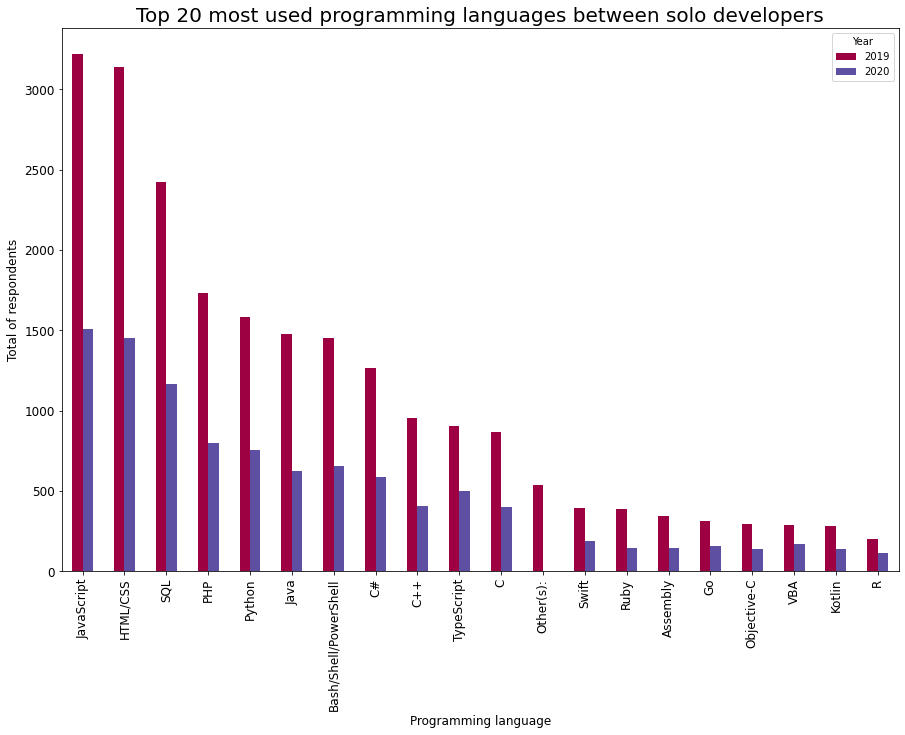

In [43]:
y_solo_comp_pivot = y_solo_comp_gb.pivot_table(index='variable', columns='Year', values='value', aggfunc='sum')
ax = y_solo_comp_pivot.sort_values(by=2019, ascending=False).head(20).plot.bar(figsize=(15,10),
                                                                               fontsize = 12,
                                                                               colormap="Spectral",
                                                                               rot=90)
ax.set_title("Top 20 most used programming languages between solo developers", fontsize = 20)
ax.set_xlabel("Programming language", fontsize = 12)
ax.set_ylabel("Total of respondents", fontsize = 12)

Now, let's check how many programming languages did people worked with based on the company size:

In [44]:
# Same process, but here we'll count the number of programming languages from each respondent
n_lang_df = pd.concat([df.drop('LanguageWorkedWith', axis=1), df.LanguageWorkedWith.str.get_dummies(sep=';')], axis=1)
n_lang_df['num_languages'] = n_lang_df[lang_list].sum(axis=1) #Counting number of programming languages used
n_lang_df = n_lang_df.drop(lang_list, axis=1)
n_lang_df.head()

,Respondent,MainBranch,Hobbyist,Employment,Country,EdLevel,UndergradMajor,OrgSize,DevType,YearsCode,...,WelcomeChange,Age,Gender,Trans,Sexuality,Ethnicity,SurveyLength,SurveyEase,Year,num_languages
0,1,I am a student who is learning to code,Yes,"Not employed, and not looking for work",United Kingdom,Primary/elementary school,NaN,NaN,NaN,4,...,Just as welcome now as I felt last year,14.0,Man,No,Straight / Heterosexual,NaN,Appropriate in length,Neither easy nor difficult,2019,4
1,2,I am a student who is learning to code,No,"Not employed, but looking for work",Bosnia and Herzegovina,"Secondary school (e.g. American high school, G...",NaN,NaN,"Developer, desktop or enterprise applications;...",NaN,...,Just as welcome now as I felt last year,19.0,Man,No,Straight / Heterosexual,NaN,Appropriate in length,Neither easy nor difficult,2019,3
2,3,"I am not primarily a developer, but I write co...",Yes,Employed full-time,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,...,Just as welcome now as I felt last year,28.0,Man,No,Straight / Heterosexual,NaN,Appropriate in length,Neither easy nor difficult,2019,1
3,4,I am a developer by profession,No,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,"Developer, full-stack",3,...,Just as welcome now as I felt last year,22.0,Man,No,Straight / Heterosexual,White or of European descent,Appropriate in length,Easy,2019,5
4,5,I am a developer by profession,Yes,Employed full-time,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","10,000 or more employees","Academic researcher;Developer, desktop or ente...",16,...,Just as welcome now as I felt last year,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,Appropriate in length,Easy,2019,7


Text(0, 0.5, 'Average number of programming languages')

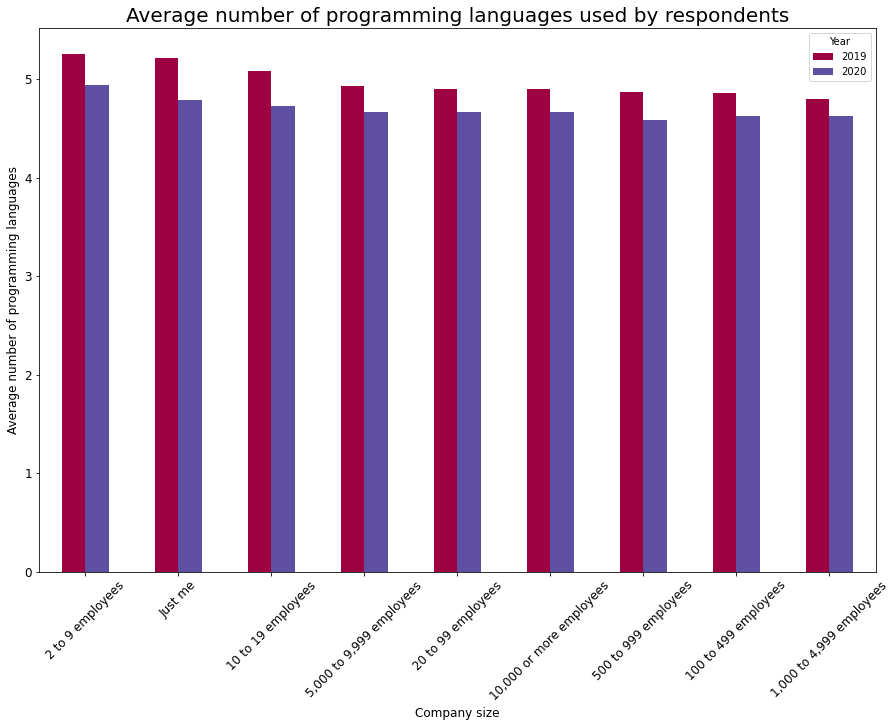

In [45]:
n_lang_pivot = n_lang_df.pivot_table(index='OrgSize', columns='Year', values='num_languages', aggfunc='mean')
n_lang_pivot = n_lang_pivot.sort_values(by=2019, ascending=False)
ax = n_lang_pivot.plot.bar(figsize=(15,10),
                           fontsize = 12,
                           colormap="Spectral",
                           rot=45)
ax.set_title("Average number of programming languages used by respondents", fontsize = 20)
ax.set_xlabel("Company size", fontsize = 12)
ax.set_ylabel("Average number of programming languages", fontsize = 12)

Noticible things we found here:
- Javascript, HTML/CSS, SQL, Java and Python appears to be the top 5 programming languages in general, but people who work solo used more PHP than Java and Python
- Coding solo or in small companies requires more programming languages than large and medium companies in general
- About 5 programming languages were used by the respondents which worked solo

## How many years of coding is needed to work solo?

Ok, now that we know the most popular coding languages used in large companies, let's find out how much time do people who work in large companies coded before:

In [46]:
coding_years = df[df['YearsCode'].notnull()].reset_index(drop=True) # removing rows with missing YearsCode variable

In [47]:
coding_years['YearsCode'] = coding_years['YearsCode'].astype(int) # now we can change the datatype to integer

<AxesSubplot:>

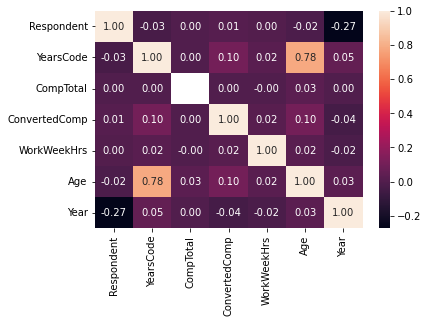

In [48]:
sns.heatmap(coding_years.corr(), annot=True, fmt=".2f")

As we could see above, years of coding is highly correlated to the age of the respondent. Let's check the most common years of coding:

In [49]:
df.YearsCode.value_counts().head()

5     11296
10    11287
6     10013
4      8983
7      8797
Name: YearsCode, dtype: int64

In [50]:
coding_df = coding_years[coding_years['OrgSize'].notnull()].reset_index(drop=True)

Text(0, 0.5, 'Average years of coding')

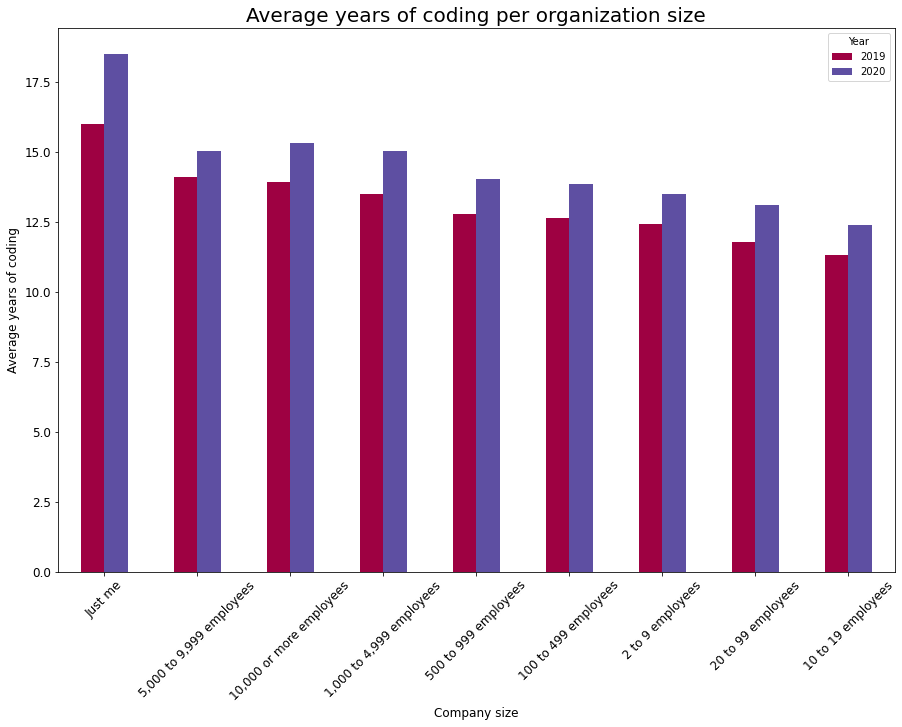

In [51]:
coding_pivot = coding_df.pivot_table(index='OrgSize', columns='Year', values='YearsCode', aggfunc='mean')
coding_pivot = coding_pivot.sort_values(by=2019, ascending=False)
ax = coding_pivot.plot.bar(figsize=(15,10),
                           fontsize = 12,
                           colormap="Spectral",
                           rot=45)
ax.set_title("Average years of coding per organization size", fontsize = 20)
ax.set_xlabel("Company size", fontsize = 12)
ax.set_ylabel("Average years of coding", fontsize = 12)

Text(0, 0.5, 'Median years of coding')

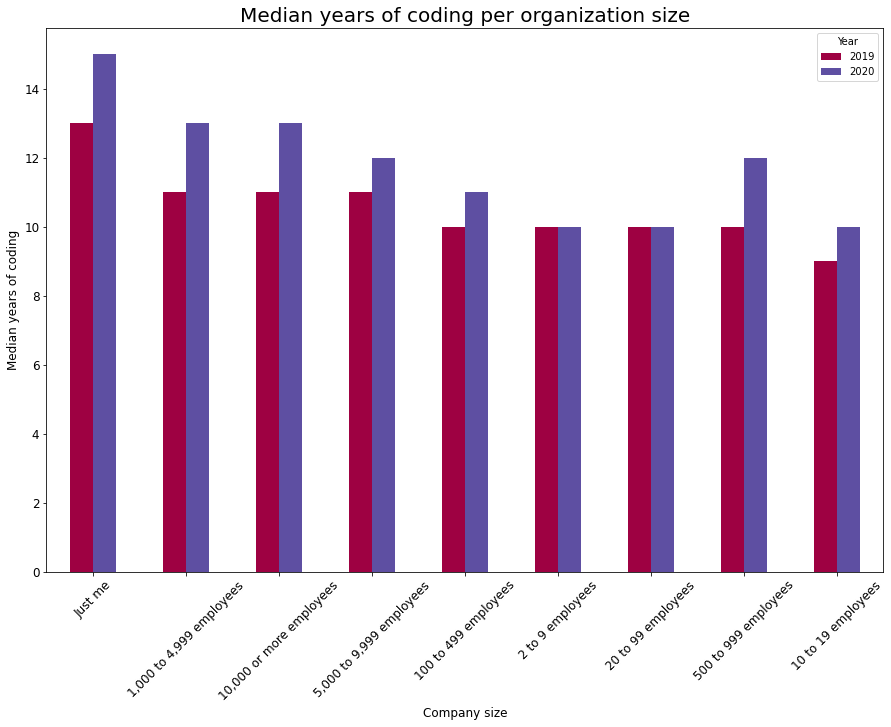

In [52]:
coding_pivot = coding_df.pivot_table(index='OrgSize', columns='Year', values='YearsCode', aggfunc='median')
coding_pivot = coding_pivot.sort_values(by=2019, ascending=False)
ax = coding_pivot.plot.bar(figsize=(15,10),
                           fontsize = 12,
                           colormap="Spectral",
                           rot=45)
ax.set_title("Median years of coding per organization size", fontsize = 20)
ax.set_xlabel("Company size", fontsize = 12)
ax.set_ylabel("Median years of coding", fontsize = 12)

Some interesting points we could see here:
- In general, people working in large companies have more years of coding experience when compared to small companies
- The years of coding average have increased from 2019 to 2020
- People who work solo appears to have more years of coding experience
- People who work solo have in average more than 17 years of coding

## Which kind of dev usualy work sole?

As DevType is a multiple choice question, we need to use the same process we used to get the programming languages for each respondent:

In [53]:
dev_list = df.DevType.str.get_dummies(sep=';').columns # list of programming languages

In [54]:
dev_df = pd.concat([df.drop('DevType', axis=1), df.DevType.str.get_dummies(sep=';')], axis=1)
dev_gb = dev_df.groupby(['Year', 'OrgSize'])[dev_list].sum().reset_index()
dev_gb = dev_gb.melt(id_vars=['Year', 'OrgSize'], value_vars=dev_list)
dev_gb.head()

,Year,OrgSize,variable,value
0,2019,"1,000 to 4,999 employees",Academic researcher,589
1,2019,10 to 19 employees,Academic researcher,419
2,2019,"10,000 or more employees",Academic researcher,592
3,2019,100 to 499 employees,Academic researcher,632
4,2019,2 to 9 employees,Academic researcher,531


<AxesSubplot:xlabel='variable'>

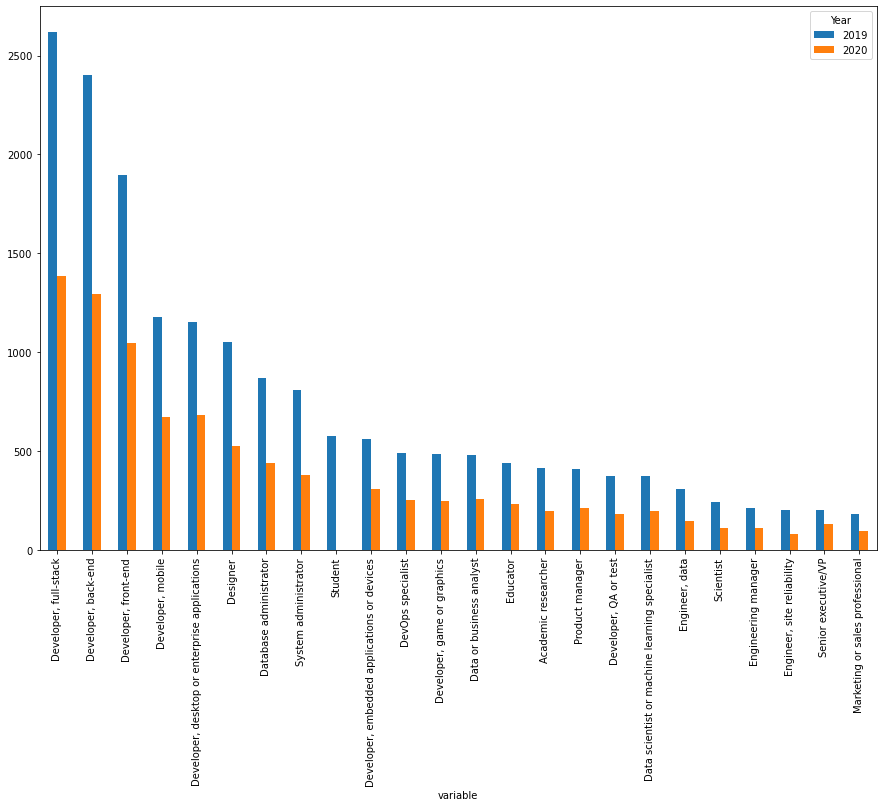

In [55]:
dev_solo_gb = dev_gb[dev_gb['OrgSize']==solo_list]
dev_solo_pivot = dev_solo_gb.pivot_table(index='variable', columns='Year', values='value', aggfunc='sum')
dev_solo_pivot.sort_values(by=2019, ascending=False).plot.bar(figsize=(15,10))

Based on the graph above, full-stack and back-end developers appear to be the most common dev type to work solo.

# Data Modeling

## Can we predict how many years have a developer been coding, based on other variables?

For this extra topic, we'll try to predict the years of coding of a developer, based on other columns we explored before. Below I seppareted some columns for this model:

In [56]:
df_mod = df[['Year', 
             'Age', # we saw that age is highly correlated to YearsCode
             'MainBranch', 
             'Employment', 
             'EdLevel', 
             'DevType', 
             'LanguageWorkedWith', 
             'OrgSize', 
             'ConvertedComp', 
             'YearsCode' # this is the variable we want to predict
            ]]

So, we already know that LanguageWorkedWith and DevType have multple choices, so we need to dummy them first:

In [57]:
df_mod = pd.concat([df_mod.drop('DevType', axis=1), df_mod.DevType.str.get_dummies(sep=';')], axis=1)
df_mod = pd.concat([df_mod.drop('LanguageWorkedWith', axis=1), df_mod.LanguageWorkedWith.str.get_dummies(sep=';')], axis=1)
df_mod.head()

,Year,Age,MainBranch,Employment,EdLevel,OrgSize,ConvertedComp,YearsCode,Academic researcher,Data or business analyst,...,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA,WebAssembly
0,2019,14.0,I am a student who is learning to code,"Not employed, and not looking for work",Primary/elementary school,NaN,NaN,4,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2019,19.0,I am a student who is learning to code,"Not employed, but looking for work","Secondary school (e.g. American high school, G...",NaN,NaN,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2019,28.0,"I am not primarily a developer, but I write co...",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",100 to 499 employees,8820.0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,22.0,I am a developer by profession,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",100 to 499 employees,61000.0,3,0,0,...,1,0,0,0,1,0,0,0,0,0
4,2019,30.0,I am a developer by profession,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","10,000 or more employees",NaN,16,1,0,...,1,0,0,0,1,0,0,0,1,0


Also, we only want respondents with YearsCode not null:

In [58]:
df_mod = df_mod[df_mod['YearsCode'].notnull()]
df_mod['YearsCode'] = df_mod['YearsCode'].astype(int) #turning into integer

In [59]:
#Drop Years of code as we want to predict it
df_mod_x = df_mod.drop(['YearsCode'], axis=1)

# Fill numeric columns with the mean
num_vars = df_mod_x.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df_mod_x[col].fillna((df_mod_x[col].mean()), inplace=True)

# Dummy the categorical variables and drop original columns
cat_vars = df_mod_x.select_dtypes(include=['object']).columns
for var in cat_vars:
    df_mod_x = pd.concat([df_mod_x.drop(var, axis=1), pd.get_dummies(df_mod_x[var], prefix=var, drop_first=True)], axis=1)

# Finding X and y
X = df_mod_x
y = df_mod['YearsCode']

In [60]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

# Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit
lm_model.fit(X_train, y_train) 

#Predict using your model
y_test_preds = lm_model.predict(X_test)

In [61]:
#Score using your model
r2score = r2_score(y_test, y_test_preds)
r2score

0.5796754292999421

So for this first attempt, we got a score of 58%, which is not the best, but could be optimized on future improvements. 
This notebook was focused on the analysis regarding solo developers, but we could see that it's possible to implement a model with other variables to predict the years of coding experience.

In [62]:
# Comparing prediction x actual 
# here I took the code from this notebook as a reference:
# https://github.com/jjrunner/stackoverflow/blob/master/PredictSalary.ipynb
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,15.0,13.920179,1.079821
1,18.0,11.822497,6.177503
2,2.0,5.076115,-3.076115
3,2.0,16.189921,-14.189921
4,11.0,11.632852,-0.632852


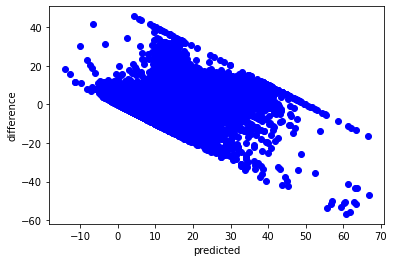

In [63]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');